# Movie Rating Prediction with Python

# Data Collection

In [11]:
import pandas as pd

# Load the dataset
file_path = 'moviesdata.csv'
movie_data = pd.read_csv(file_path, encoding="latin1")

# Display the first few rows of the dataset
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Preprocessing

In [12]:
movie_data.dropna(subset=["Rating"], inplace = True)
movie_data.isnull().sum()

movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Genre'],inplace=True)
movie_data.isnull().sum()

movie_data.head()

# convert votes columns



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [13]:

from sklearn.preprocessing import StandardScaler

print(movie_data.isnull().sum())

# Clean 'Votes' column
movie_data['Votes'] = movie_data['Votes'].astype(str).str.replace(',', '', regex=False)
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')

# Clean 'Duration' column
movie_data['Duration'] = movie_data['Duration'].astype(str).str.replace('min', '', regex=False)
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'], errors='coerce')
movie_data['Duration'].fillna(movie_data['Duration'].median(), inplace=True)

# One-Hot Encoding for categorical variable
movie_data = pd.get_dummies(movie_data, columns=['Genre','Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
movie_data[['Duration', 'Votes']] = scaler.fit_transform(movie_data[['Duration', 'Votes']])

# Check for missing values again
print("\nMissing values after preprocessing:")
print(movie_data.isnull().sum())

print(movie_data.columns)


Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

Missing values after preprocessing:


C:\Users\jaypa\AppData\Local\Temp\ipykernel_14692\2414358525.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Duration'].fillna(movie_data['Duration'].median(), inplace=True)


Name                      0
Year                      0
Duration                  0
Rating                    0
Votes                     0
                         ..
Actor 3_Zeishan Quadri    0
Actor 3_Zenobia Shroff    0
Actor 3_Zohra             0
Actor 3_Zoya Hussain      0
Actor 3_Zulfi Sayed       0
Length: 8647, dtype: int64
Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director',
       'Genre_Action, Adventure', 'Genre_Action, Adventure, Biography',
       'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Crime',
       ...
       'Actor 3_Zarine Ali', 'Actor 3_Zayed Khan', 'Actor 3_Zebunissa',
       'Actor 3_Zeenat Aman', 'Actor 3_Zeeshan Khan', 'Actor 3_Zeishan Quadri',
       'Actor 3_Zenobia Shroff', 'Actor 3_Zohra', 'Actor 3_Zoya Hussain',
       'Actor 3_Zulfi Sayed'],
      dtype='object', length=8647)


# Exploratory Data Analysis (EDA)

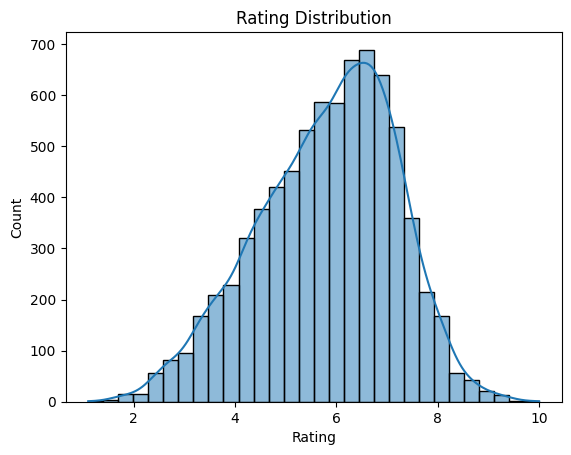

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating distribution
sns.histplot(movie_data['Rating'], bins=30, kde=True)
plt.title('Rating Distribution')
plt.show()

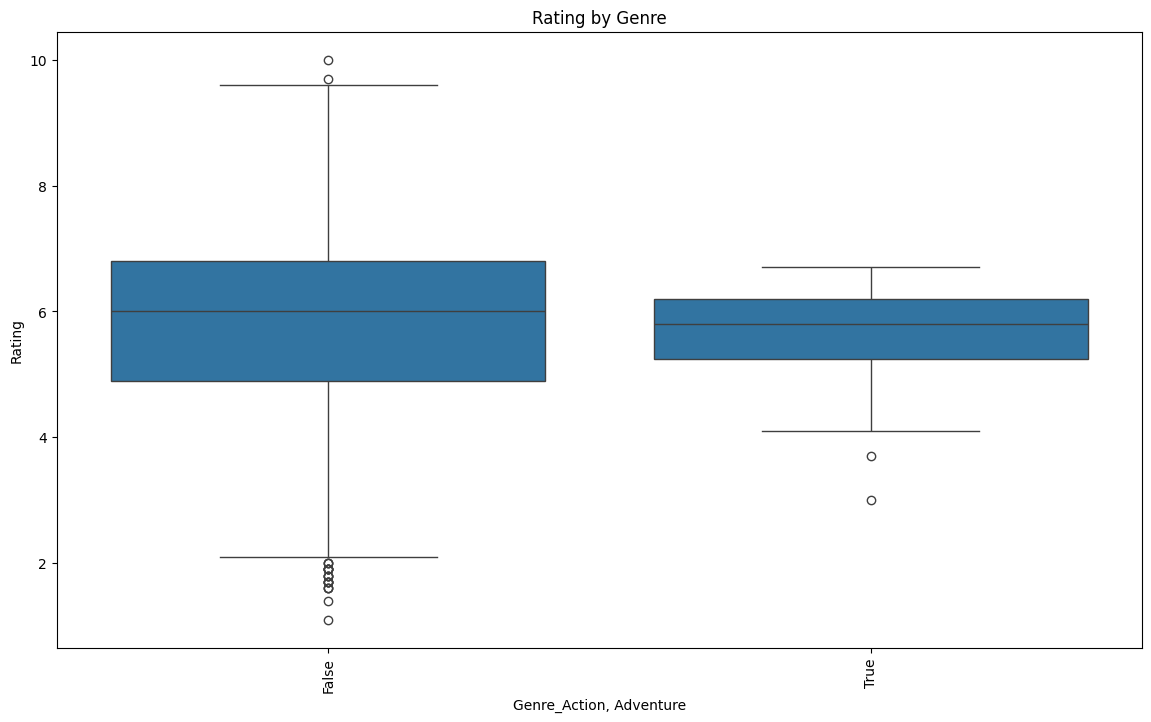

In [15]:
# Rating by genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre_Action, Adventure', y='Rating', data=movie_data)
plt.title('Rating by Genre')
plt.xticks(rotation=90)
plt.show()


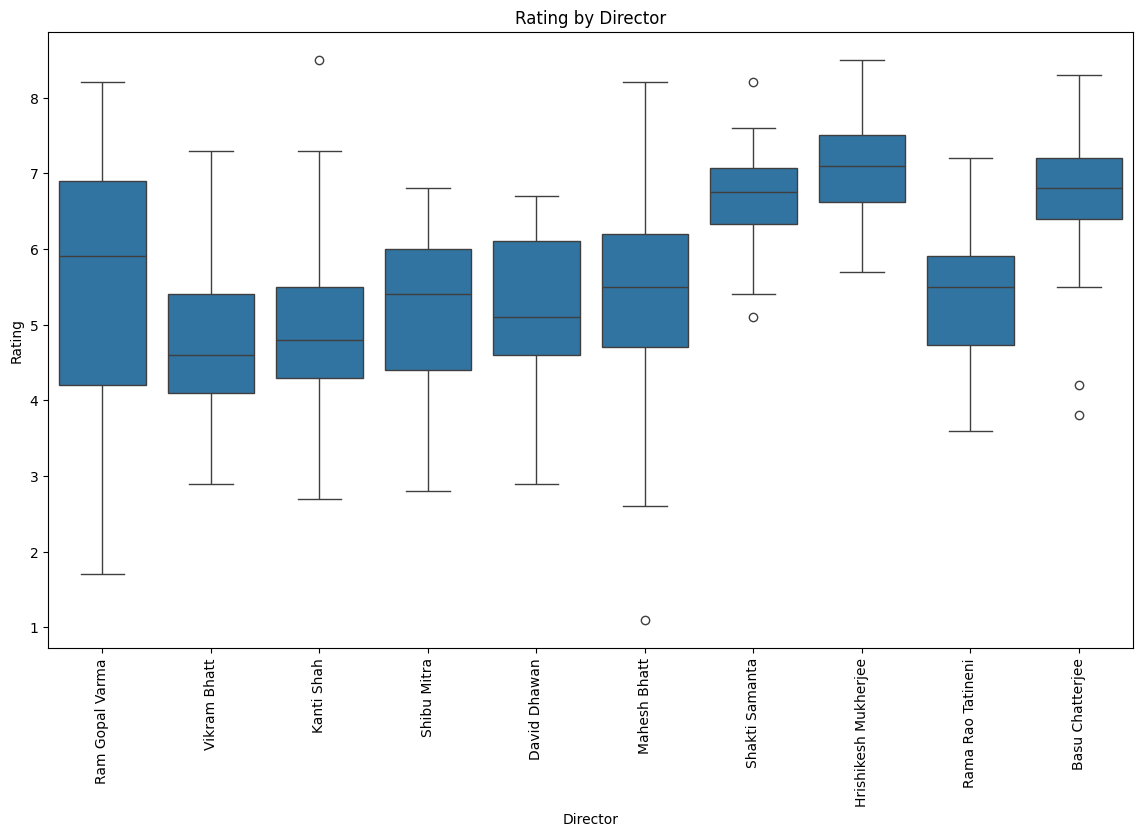

In [16]:
# Rating by director (show top 10 directors by movie count)
top_directors = movie_data['Director'].value_counts().head(10).index
top_directors_data = movie_data[movie_data['Director'].isin(top_directors)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Director', y='Rating', data=top_directors_data)
plt.title('Rating by Director')
plt.xticks(rotation=90)
plt.show()

# Model Building

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

non_numeric_directors = movie_data[~movie_data['Director'].apply(lambda x: isinstance(x, (int, float)))]['Director']
print(non_numeric_directors)

# One-hot encode 'Director' column
movie_data = pd.get_dummies(movie_data, columns=['Director'])

# Define features and target
X = movie_data.drop(['Name', 'Year', 'Rating'], axis=1)
y = movie_data['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# # Define features and target
# X = movie_data.drop(['Name', 'Year', 'Rating'], axis=1)
# y = movie_data['Rating']


# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print('Mean Squared Error:', mse)

1            Gaurav Bakshi
3               Ovais Khan
5             Rahul Rawail
6           Shoojit Sircar
8            Allyson Patel
               ...        
15501    Bharat Rangachary
15503      S.P. Muthuraman
15504        Mahendra Shah
15505           Kuku Kohli
15508         K.C. Bokadia
Name: Director, Length: 7558, dtype: object
Mean Squared Error: 1.3989568287924224e+25


# Model Tuning


In [27]:
# Example new movie data (make sure to include all necessary columns with 0s where appropriate)
new_movie = {
    'Duration': [10],  # example duration
    'Votes': [100000],    # example number of votes
    # One-hot encoded genre (adjust column names as per your dataset)
    'Genre_Action': [1],  
    'Genre_Comedy': [0],
    'Genre_Drama': [0],
    # One-hot encoded director (adjust column names as per your dataset)
    'Director_Some Director': [1],  
    # One-hot encoded actors (adjust column names as per your dataset)
    'Actor 1_Some Actor': [0],      
    'Actor 2_Some Actor': [0],      
    'Actor 3_Some Actor': [1]       
}

# Convert new movie data to DataFrame
new_movie_df = pd.DataFrame(new_movie)

# Ensure the new data has the same columns as the training data
new_movie_df = new_movie_df.reindex(columns=X.columns, fill_value=0)

# Normalize numerical features
new_movie_df[['Duration', 'Votes']] = scaler.transform(new_movie_df[['Duration', 'Votes']])

# Predict the rating
predicted_rating = model.predict(new_movie_df)
print('Predicted Rating:', predicted_rating)

Predicted Rating: [1.35373772e+11]
